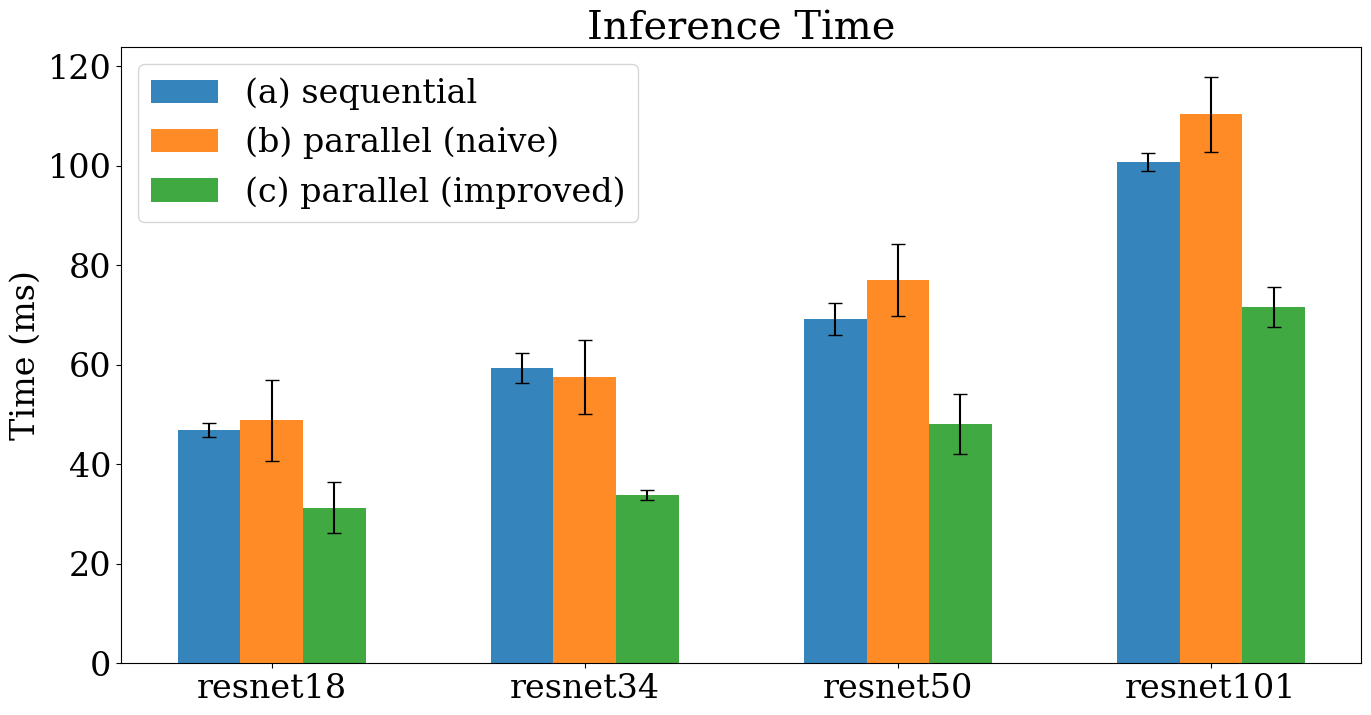

In [1]:
import json
import os
import numpy as np
import pandas as pd

path = '/gallery_uffizi/sehun.lee/dev/lectures/aisys/MMsys/log/synthetic'

filenames = os.listdir(path)
filenames = sorted(filenames)

df = pd.DataFrame(columns = ['name', 'model', 'model_depth', 'time', 'std'])

for filename in filenames:
    filepath = os.path.join(path, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    durs = []
    for v in data['traceEvents']:
        if 'ProfilerStep' in v['name']:
            durs.append(v['dur']) 
    
    durs = np.array(durs) / 1000.0
    
    df.loc[len(df)] = [
        '_'.join(filename.split('.')[0].split('_')[:-2]),
        filename.split('.')[0].split('_')[-2],
        int(filename.split('.')[0].split('_')[-2][6:]), durs.mean(), durs.std()]

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 24

models = ['resnet18', 'resnet34', 'resnet50', 'resnet101']
names = ['sequential', 'parallel_naive', 'parallel_improved']
new_names = ['(a) sequential', '(b) parallel (naive)', '(c) parallel (improved)']
x_range = np.arange(4)

plt.figure(figsize=(16, 8))
plt.tight_layout()

filtered_df = df[df['name'] == names[0]].sort_values(by='model_depth')
plt.bar(x_range - 0.2, filtered_df['time'], 0.2, yerr=filtered_df['std'], align='center', alpha=0.9, ecolor='black', capsize=5)
filtered_df = df[df['name'] == names[1]].sort_values(by='model_depth')
plt.bar(x_range, filtered_df['time'], 0.2, yerr=filtered_df['std'], align='center', alpha=0.9, ecolor='black', capsize=5)
filtered_df = df[df['name'] == names[2]].sort_values(by='model_depth')
plt.bar(x_range + 0.2, filtered_df['time'], 0.2, yerr=filtered_df['std'], align='center', alpha=0.9, ecolor='black', capsize=5)

plt.xticks(x_range, models)
plt.ylabel('Time (ms)')
plt.title('Inference Time')
plt.legend(new_names)

plt.show()

In [72]:
for model in models:
    a = np.array(df[df['model'] == model]['time'])
    b = np.array(df[(df['model'] == model) & (df['name'] == 'sequential')]['time'])
    print((b - a) / b * 100)

[33.25789104 -4.13787807  0.        ]
[43.03579514  3.22992741  0.        ]
[ 30.56674023 -11.20208083   0.        ]
[28.86108059 -9.48687641  0.        ]


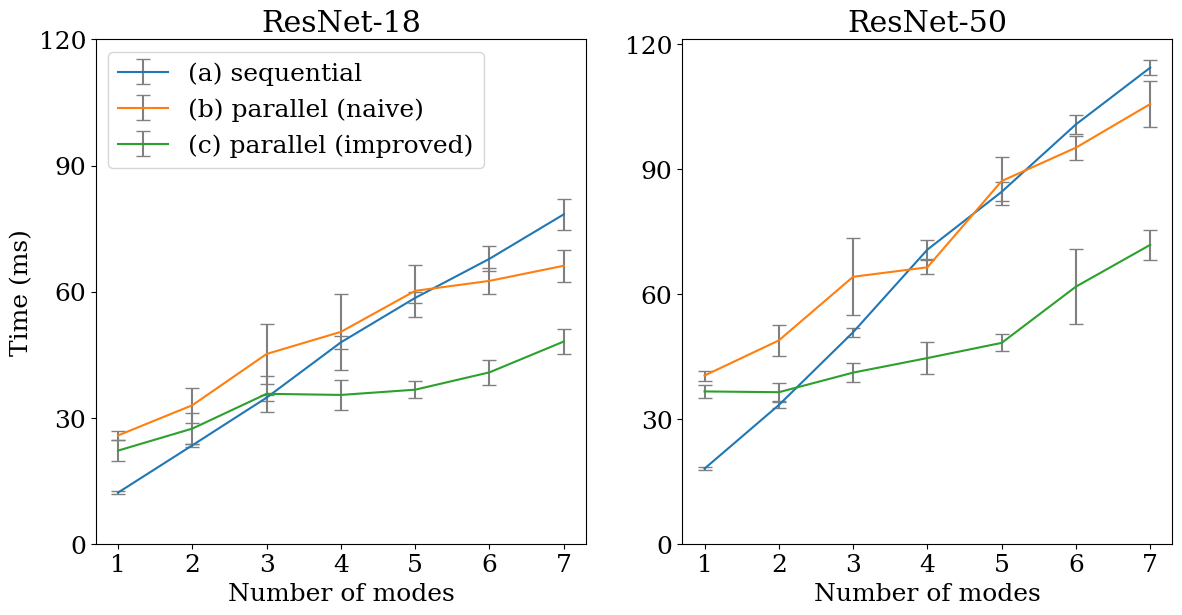

In [4]:
import json
import os
import numpy as np
import pandas as pd

path = '/gallery_uffizi/sehun.lee/dev/lectures/aisys/MMsys/log/synthetic_num_modes'

filenames = os.listdir(path)
filenames = sorted(filenames)

df = pd.DataFrame(columns = ['name', 'model', 'num_modes', 'time', 'std'])

for filename in filenames:
    filepath = os.path.join(path, filename)
    with open(filepath, 'r') as f:
        data = json.load(f)
    
    durs = []
    for v in data['traceEvents']:
        if 'ProfilerStep' in v['name']:
            durs.append(v['dur']) 
    
    durs = np.array(durs) / 1000.0
    
    
    df.loc[len(df)] = ['_'.join(filename.split('.')[0].split('_')[:-2]), filename.split('.')[0].split('_')[-2], int(filename.split('.')[0].split('_')[-1]), durs.mean(), durs.std()]
    
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 18

names = ['sequential', 'parallel_naive', 'parallel_improved']
max_range = 7
x_range = np.arange(1, max_range + 1)

new_df = df[(df['num_modes'] <= max_range) & (df['model'] == 'resnet18')]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plt.tight_layout()

filtered_df = new_df[new_df['name'] == names[0]]
ax1.errorbar(x_range, filtered_df['time'], yerr=filtered_df['std'], ecolor='gray', capsize=5)
filtered_df = new_df[new_df['name'] == names[1]]
ax1.errorbar(x_range, filtered_df['time'], yerr=filtered_df['std'], ecolor='gray', capsize=5)
filtered_df = new_df[new_df['name'] == names[2]]
ax1.errorbar(x_range, filtered_df['time'], yerr=filtered_df['std'], ecolor='gray', capsize=5)

# plt.xticks(x_range, models)
ax1.set_xticks(x_range)
ax1.set_yticks([0, 30, 60, 90, 120])
ax1.set_xlabel('Number of modes')
ax1.set_ylabel('Time (ms)')
ax1.set_title('ResNet-18')
ax1.legend(new_names, loc='upper left')

new_df = df[(df['num_modes'] <= max_range) & (df['model'] == 'resnet50')]

filtered_df = new_df[new_df['name'] == names[0]]
ax2.errorbar(x_range, filtered_df['time'], yerr=filtered_df['std'], ecolor='gray', capsize=5)
filtered_df = new_df[new_df['name'] == names[1]]
ax2.errorbar(x_range, filtered_df['time'], yerr=filtered_df['std'], ecolor='gray', capsize=5)
filtered_df = new_df[new_df['name'] == names[2]]
ax2.errorbar(x_range, filtered_df['time'], yerr=filtered_df['std'], ecolor='gray', capsize=5)

# plt.xticks(x_range, models)
ax2.set_xticks(x_range)
ax2.set_yticks([0, 30, 60, 90, 120])
ax2.set_xlabel('Number of modes')
ax2.set_title('ResNet-50')

plt.show()